In [1]:
import numpy as np
from src.plot_utils import plt, savefig

%matplotlib inline

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['lines.linewidth'] = 1

## Duality

Primal form

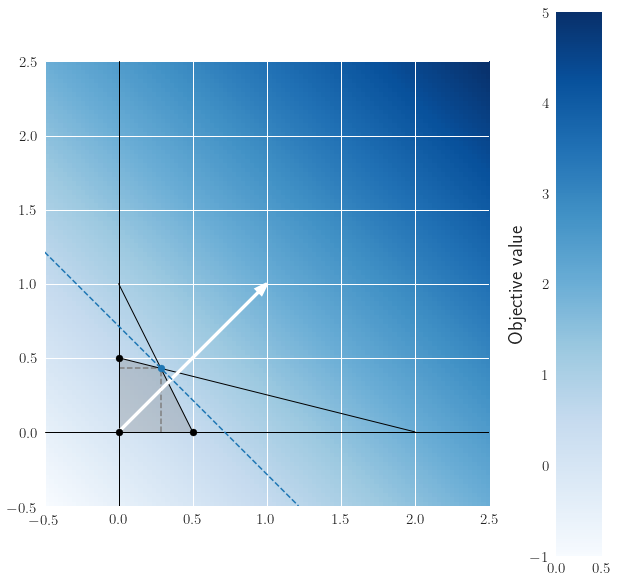

In [3]:
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(1, 10)

ax = fig.add_subplot(grid[0, :-2])
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)

# Plot objective value heatmap
x1s = np.linspace(-0.5, 2.5, 100)
x2s = np.linspace(-0.5, 2.5, 100)[:, np.newaxis]
obj_values = x1s + x2s
ax.imshow(obj_values, cmap='Blues', vmin=obj_values.min(), vmax=obj_values.max(),
         extent=[-0.5, 2.5, -0.5, 2.5], origin='lower')

# Shade feasible region
ax.fill_between(x=[0, 2/7, 0.5],
               y1=[0, 0, 0],
               y2=[0.5, 3/7, 0],
               color='tab:gray', zorder=10, alpha=0.3)

# Plot feasible region boundaries
ax.axhline(0, color='black', zorder=11)
ax.axvline(0, color='black', zorder=11)
ax.plot([0, 0.5], [1, 0], color='black', zorder=11)
ax.plot([0, 2], [0.5, 0], color='black', zorder=11)

# Plot normal vector
ax.arrow(0, 0, 1, 1, length_includes_head=True, linewidth=3, head_width=0.05, fc='white', ec='white', zorder=12)

# Plot objective function level curves
# ax.plot([-0.5, 0.5], [0.5, -0.5], color='tab:cyan', lw=1.5, ls='--', zorder=13)
ax.plot([-0.5, 5/7+0.5], [5/7+0.5, -0.5], color='tab:blue', lw=1.5, ls='--', zorder=13)

# Plot feasible region vertices
ax.scatter(0, 0, color='black', zorder=14)
ax.scatter(0.5, 0, color='black', zorder=14)
ax.scatter(0, 0.5, color='black', zorder=14)
ax.scatter(2/7, 3/7, color='tab:blue', zorder=14)

# Plot traces for ooptimal point
ax.vlines(2/7, 0, 3/7, color='tab:gray', lw=1.5, ls='--', zorder=11)
ax.hlines(3/7, 0, 2/7, color='tab:gray', lw=1.5, ls='--', zorder=11)

# Plot color bar of objective value
axc = fig.add_subplot(grid[0, -1:])
cmap = plt.cm.get_cmap('Blues_r')
colors = cmap(np.arange(cmap.N))
axc.imshow(colors[:, np.newaxis], extent=[0, 0.5, -1, 5])
axc.grid(None)

axc.set_ylabel('Objective value', fontsize=20)

savefig(fig, 'primal_one_slide.png')

Dual form

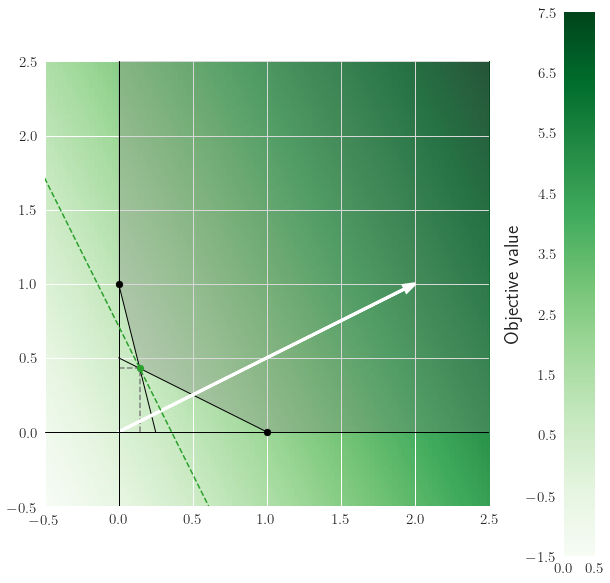

In [4]:
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(1, 10)

ax = fig.add_subplot(grid[0, :-2])
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)

# Plot objective value heatmap
x1s = np.linspace(-0.5, 2.5, 100)
x2s = np.linspace(-0.5, 2.5, 100)[:, np.newaxis]
obj_values = 2 * x1s + x2s
ax.imshow(obj_values, cmap='Greens', vmin=obj_values.min(), vmax=obj_values.max(),
         extent=[-0.5, 2.5, -0.5, 2.5], origin='lower')

# Shade feasible region
ax.fill_between(x=[0, 1/7, 1, 2.5],
               y1=[1, 3/7, 0, 0],
               y2=[10, 10, 10, 10],
               color='tab:gray', alpha=0.3, zorder=10)

# Plot feasible region boundaries
ax.axhline(0, color='black', zorder=13)
ax.axvline(0, color='black', zorder=13)
ax.plot([0, 0.25], [1, 0], color='black', zorder=11)
ax.plot([0, 1], [0.5, 0], color='black', zorder=11)

# Plot normal vector
ax.arrow(0, 0, 2, 1, length_includes_head=True, linewidth=3, head_width=0.05, fc='white', ec='white', zorder=12)

# Plot objective function level curves
ax.plot([-0.5, 1/7+(3/7+0.5)/2], [5/7+0.5*2, -0.5], color='tab:green', lw=1.5, ls='--', zorder=13)

# Plot feasible region vertices
ax.scatter(1, 0, color='black', zorder=14)
ax.scatter(0, 1, color='black', zorder=14)
ax.scatter(1/7, 3/7, color='tab:green', zorder=14)

# Plot traces for ooptimal point
ax.vlines(1/7, 0, 3/7, color='tab:gray', lw=1.5, ls='--', zorder=11)
ax.hlines(3/7, 0, 1/7, color='tab:gray', lw=1.5, ls='--', zorder=11)

# Plot color bar of objective value
axc = fig.add_subplot(grid[0, -1:])
cmap = plt.cm.get_cmap('Greens_r')
colors = cmap(np.arange(cmap.N))
axc.imshow(colors[:, np.newaxis], extent=[0, 0.5, -1.5, 7.5])
axc.grid(None)
axc.set_ylabel('Objective value', fontsize=20)
axc.set_yticks(np.arange(-1.5, 7.6, 1))

savefig(fig, 'dual_slide.png')

### Theoretical upper bound of an optimization problem

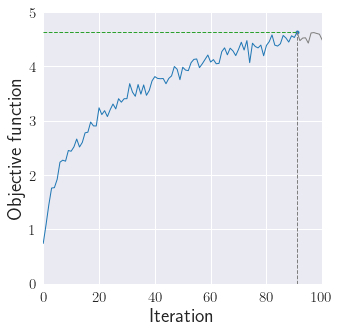

In [5]:
iterations = np.arange(0, 101)
obj_values = np.log(iterations + 2)
rng = np.random.RandomState(seed=42)
noises = rng.standard_normal(len(iterations)) / 10
obj_values += noises
where_max = np.argmax(obj_values)

# Plot objective value before and after maximum value
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(iterations[:where_max+1], obj_values[:where_max+1], color='tab:blue')
ax.plot(iterations[where_max:], obj_values[where_max:], color='tab:gray')

# Plot theoretical upper bound
ax.hlines(obj_values[where_max], 0, iterations[where_max], color='tab:green', ls='--')
ax.vlines(iterations[where_max], 0, obj_values[where_max], color='tab:gray', ls='--')
ax.scatter(iterations[where_max], obj_values[where_max], color='tab:blue', marker='.')

ax.set_xlabel('Iteration')
ax.set_ylabel('Objective function')

ax.set_xlim(0, 100)
ax.set_ylim(0, 5)

savefig(fig, 'stop_optimization.png')

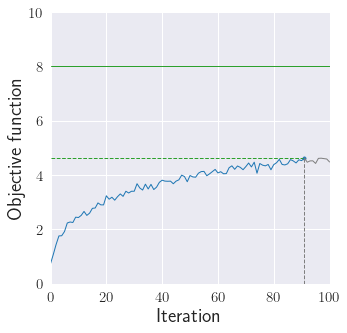

In [6]:
iterations = np.arange(0, 101)
obj_values = np.log(iterations + 2)
rng = np.random.RandomState(seed=42)
noises = rng.standard_normal(len(iterations)) / 10
obj_values += noises
where_max = np.argmax(obj_values)

# Plot objective value before and after maximum value
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(iterations[:where_max+1], obj_values[:where_max+1], color='tab:blue')
ax.plot(iterations[where_max:], obj_values[where_max:], color='tab:gray')

# Plot theoretical upper bound
ax.hlines(obj_values[where_max], 0, iterations[where_max], color='tab:green', ls='--')
ax.vlines(iterations[where_max], 0, obj_values[where_max], color='tab:gray', ls='--')
ax.scatter(iterations[where_max], obj_values[where_max], color='tab:blue', marker='.')

# Plot non-optimal upper bound
ax.axhline(8, color='tab:green')

ax.set_xlabel('Iteration')
ax.set_ylabel('Objective function')

ax.set_xlim(0, 100)
ax.set_ylim(0, 10)

savefig(fig, 'duality.png')